In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
# IMPORTING DATASET
crime=pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime.rename({"Unnamed: 0":"Region"},inplace=True,axis=1)
crime.head()

,Region,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
# NORMALIZATION FUNCTION 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_norm = scaler.fit_transform(crime.iloc[:,1:])

# HIERARCHICAL CLUSTERING

In [5]:
z = linkage(df_norm, method="complete",metric="euclidean")

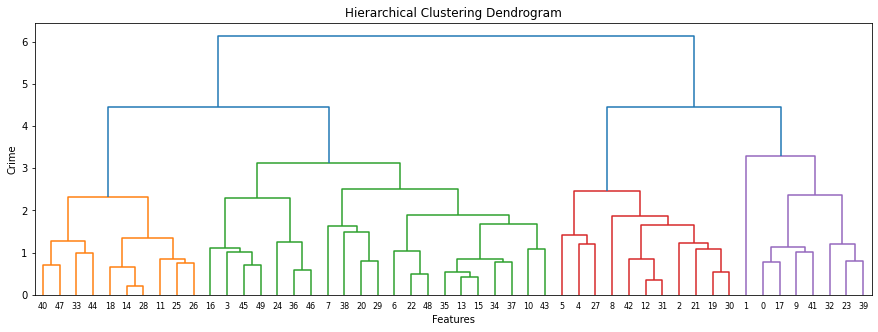

In [6]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(z, leaf_rotation=0., leaf_font_size=8)
plt.show()

In [7]:
# CREATE CLUSTERS
H_C= AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')

In [8]:
# SAVE CLUSTERS FOR CHART
heir_df=crime.copy()
heir_df['clusetr_ID'] = H_C.fit_predict(df_norm)
heir_df

,Region,Murder,Assault,UrbanPop,Rape,clusetr_ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [9]:
heir_df.groupby("clusetr_ID").sum()

,Murder,Assault,UrbanPop,Rape
clusetr_ID,,,,
0,342.8,7412,2977,898.6
1,21.2,528,172,86.6
2,15.4,335,80,31.9
3,10.0,263,48,44.5


# K-MEANS

C:\Users\haari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


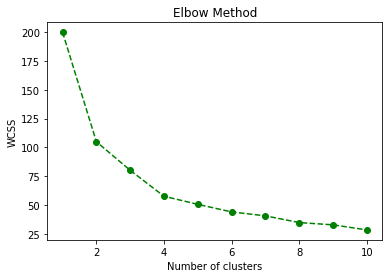

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss,"o--g")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

In [11]:
# BUILD CLUSTER ALGORITHMS
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(df_norm)

KMeans(n_clusters=4, random_state=42)

In [12]:
# ASSIGN CLUSTER TO DATASET
km_df=crime.copy()
km_df['Cluster_ID'] = clusters_new.labels_

In [13]:
km_df.Cluster_ID.value_counts()

0    16
2    13
3    13
1     8
Name: Cluster_ID, dtype: int64

In [14]:
km_df

,Region,Murder,Assault,UrbanPop,Rape,Cluster_ID
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [15]:
km_df.groupby("Cluster_ID").sum()

,Murder,Assault,UrbanPop,Rape
Cluster_ID,,,,
0,90.5,2222,1182,300.5
1,111.5,1949,430,171.3
2,140.6,3346,988,431.5
3,46.8,1021,677,158.3


# DB-SCAN

In [16]:
dbscan = DBSCAN(eps=1.3, min_samples=4)
dbscan.fit(df_norm)

DBSCAN(eps=1.3, min_samples=4)

In [17]:
dbscan.labels_

array([ 0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [18]:
clusters=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [19]:
db_df=pd.concat([crime,clusters],axis=1)
db_df

,Region,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [20]:
db_df.groupby('Cluster').sum()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
-1,34.4,874,219,117.0
0,355.0,7664,3058,944.6
